29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8009 - loss: 0.5676 - val_accuracy: 0.8840 - val_loss: 0.3308
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8970 - loss: 0.2884 - val_accuracy: 0.8928 - val_loss: 0.2944
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2406 - val_accuracy: 0.9027 - val_loss: 0.2677
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9259 - loss: 0.2036 - val_accuracy: 0.9039 - val_loss: 0.2599
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9364 - loss: 0.1773 - val_accuracy: 0.9126 - val_loss: 0.2498
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9436 - loss: 0.1537 - val_accuracy: 0.9138 - val_loss: 0.2571
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9512 - loss: 0.1364 - val_accuracy: 0.9123 - val_loss: 0.2568
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1229 - val_accuracy: 0.

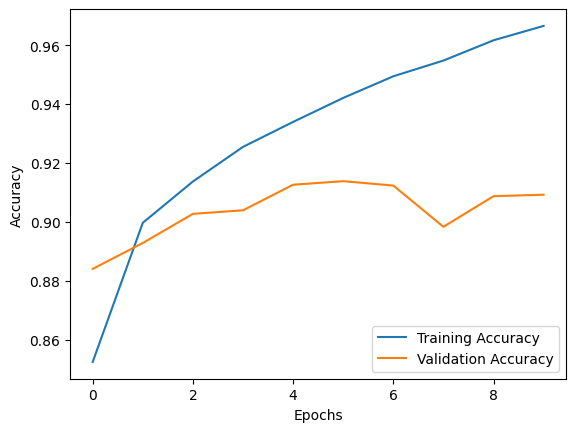

313/313 - 1s - 3ms/step - accuracy: 0.9092 - loss: 0.3047
Test Accuracy: 0.9092000126838684


In [59]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=64)


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test Accuracy: {test_acc}")
